In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('house price prediction').getOrCreate() # put the name of the project 

In [2]:
# import packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew
%matplotlib inline

In [3]:
# read the data in pandas dataframe 
train=pd.read_csv("train.csv")
train.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


The above table only shows the numeric features in the data set. 

In [5]:
# Describe the Data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Some Analysis on the Target Variable-Sale Price

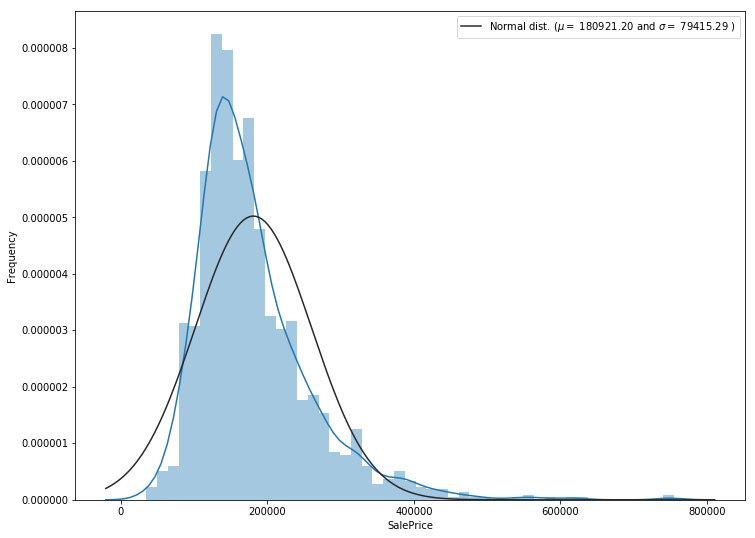

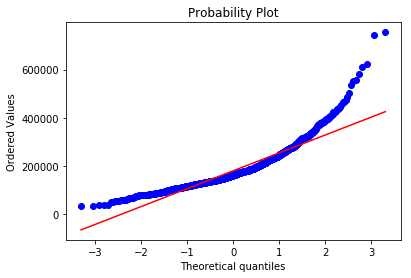

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Apply Log Transform to Sale Price


 mu = 12.02 and sigma = 0.40



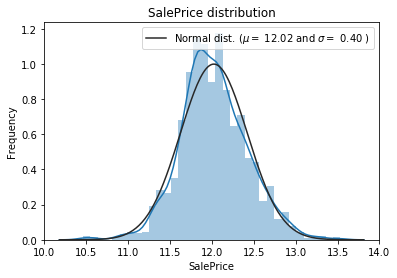

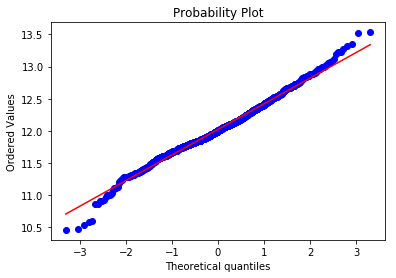

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Correlation between train attributes 

In [8]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [9]:
train_corr.shape

(1460, 38)

In [10]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

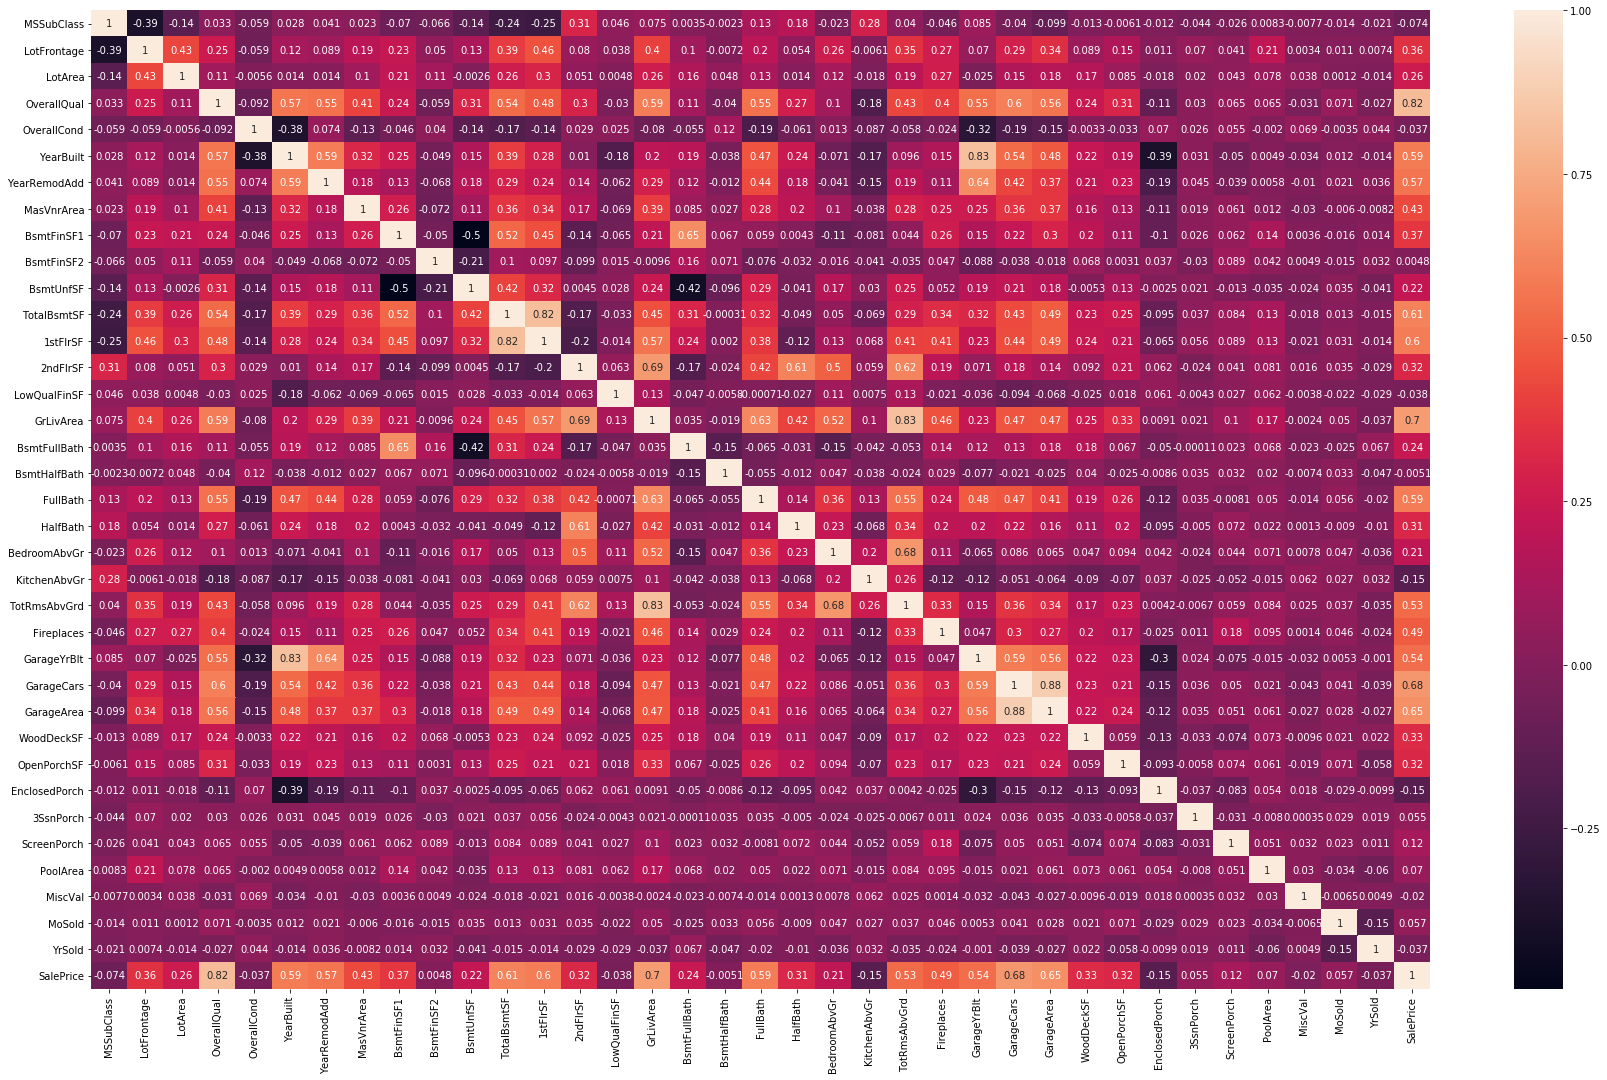

In [11]:
#Correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(30,18))
sns.heatmap(corr, annot=True)

# Top 50% Corralation train attributes with sale-price

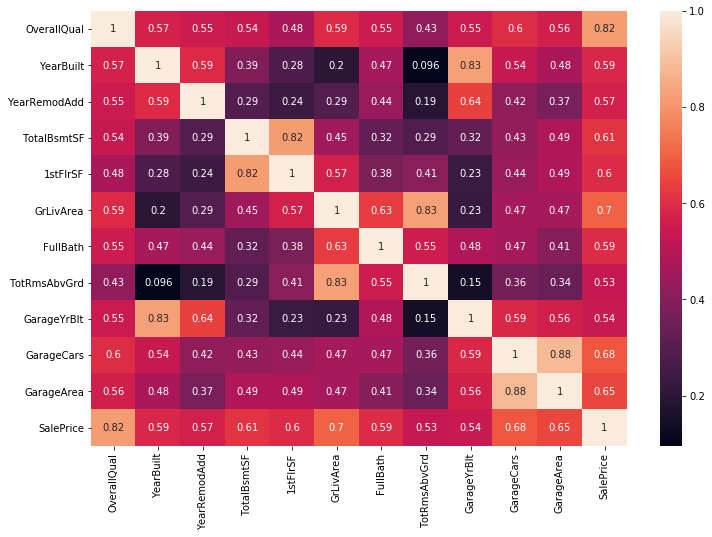

In [12]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here, Overall Quality is highly correlated with target features of sale price by 82% 

In [13]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

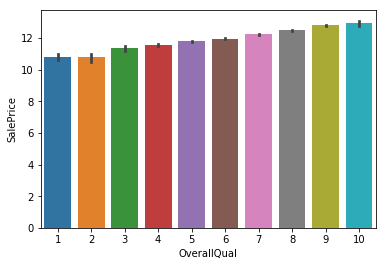

In [14]:
sns.barplot(train.OverallQual, train.SalePrice)


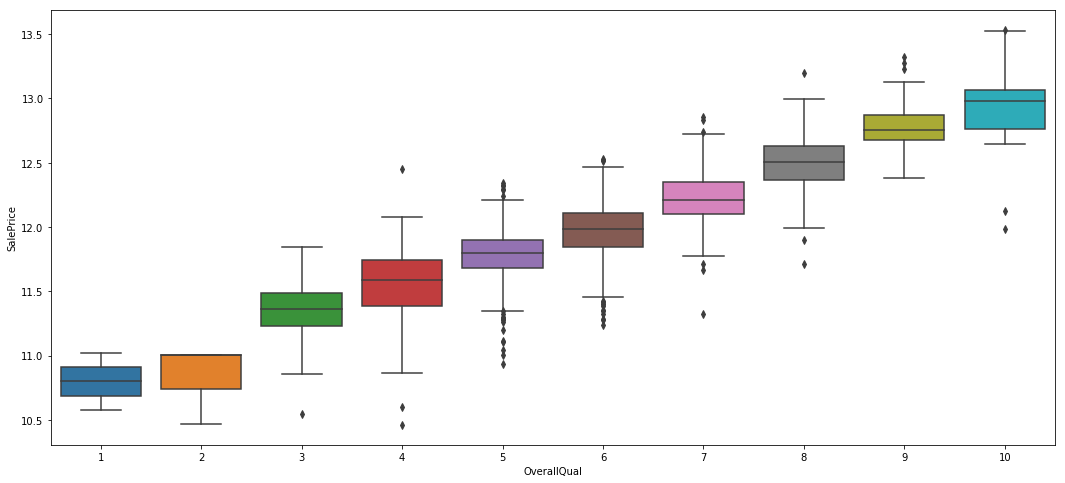

In [15]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

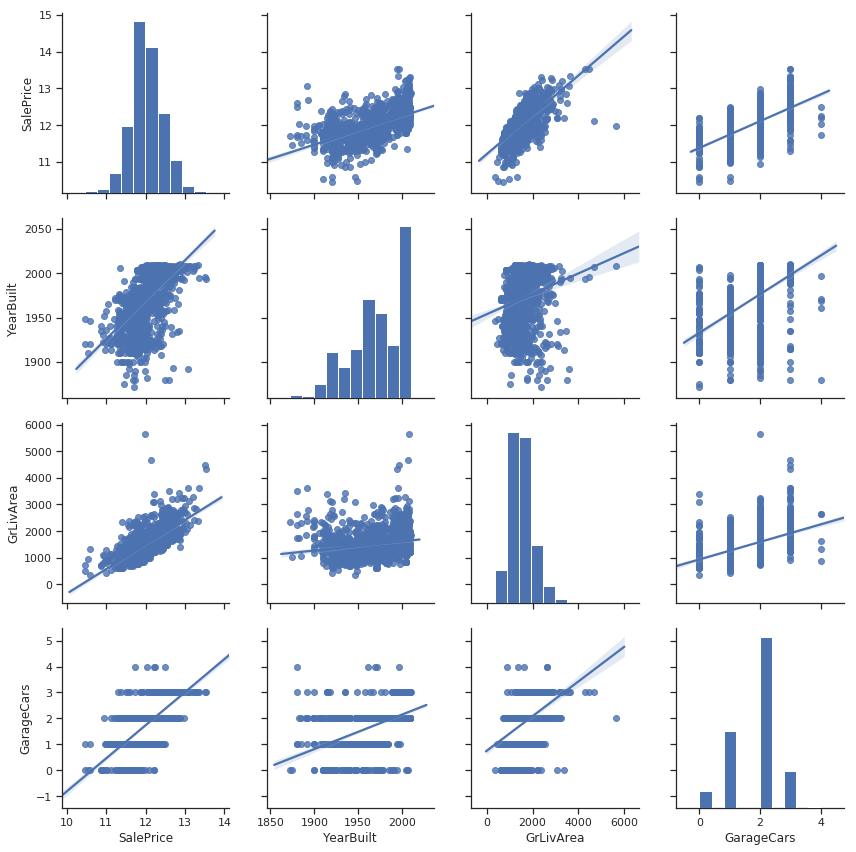

In [16]:
col = ['SalePrice', 'YearBuilt', 'GrLivArea','GarageCars']
sns.set(style='ticks')
sns.pairplot(train[col], height=3, kind='reg')

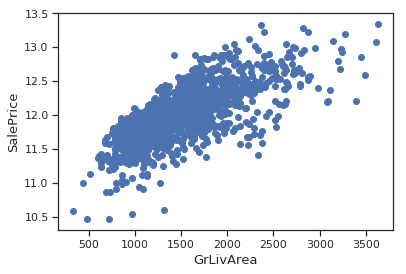

In [17]:
# Delete Outliners 
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Check graphic again 
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

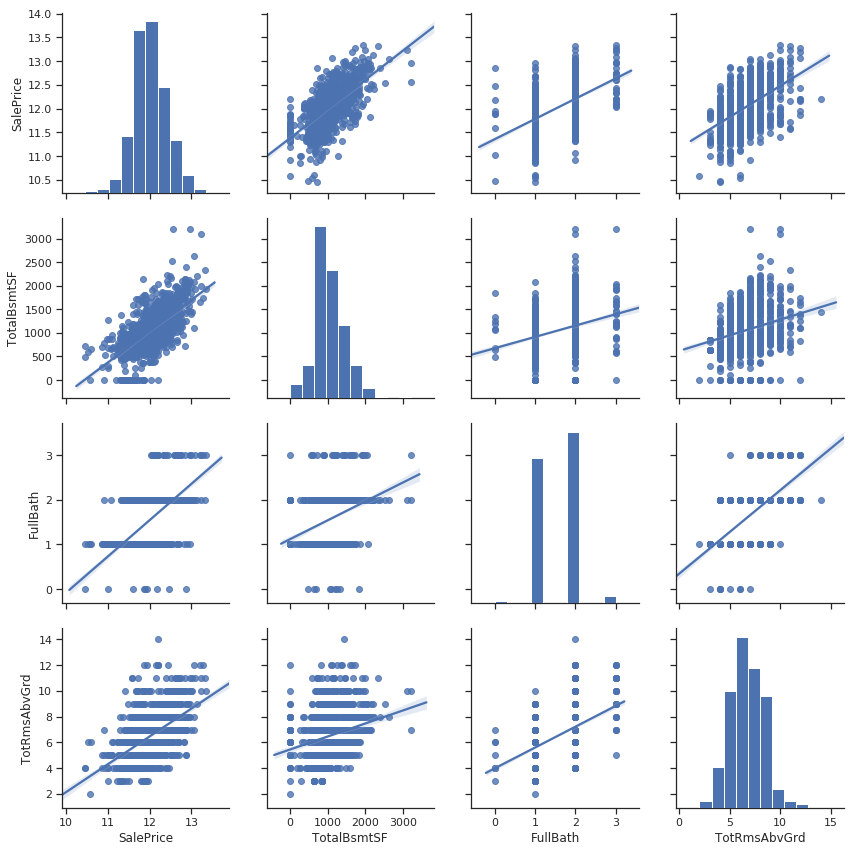

In [18]:
col = ['SalePrice','TotalBsmtSF','FullBath','TotRmsAbvGrd']
sns.set(style='ticks')
sns.pairplot(train[col], height=3, kind='reg')

In [19]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
Id              -0.020511
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   -0.148636
Name: SalePr

# Check the Missing Value

In [20]:
# check the missing value 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

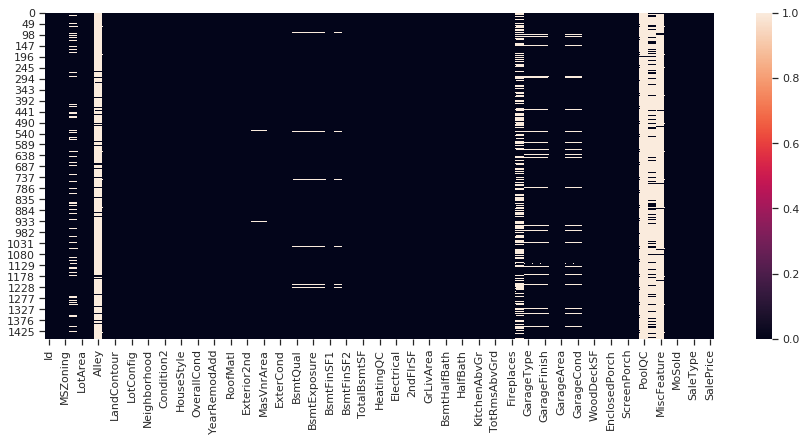

In [21]:
# plot of missing value attributes
plt.figure(figsize=(15, 6))
sns.heatmap(train.isnull())
plt.show()

In [22]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.656593
MiscFeature     96.291209
Alley           93.750000
Fence           80.769231
FireplaceQu     47.390110
LotFrontage     17.788462
GarageYrBlt      5.563187
GarageType       5.563187
GarageFinish     5.563187
GarageQual       5.563187
GarageCond       5.563187
BsmtFinType2     2.609890
BsmtExposure     2.609890
BsmtFinType1     2.541209
BsmtCond         2.541209
BsmtQual         2.541209
MasVnrArea       0.549451
MasVnrType       0.549451
Electrical       0.068681
dtype: float64

# Visualize Missing Value 

In [23]:
#Convert into dataframe
Isnull = Isnull.to_frame()


In [24]:
Isnull.columns = ['count']

In [25]:
Isnull.index.names = ['Name']

In [26]:
Isnull['Name'] = Isnull.index

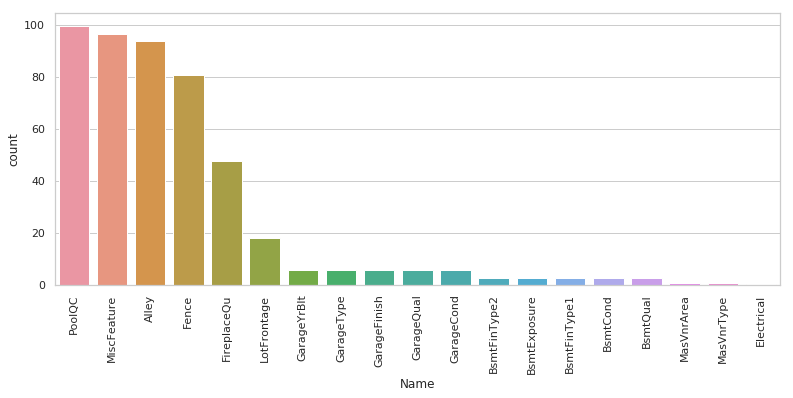

In [27]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

# Impute Missing Value 

In [28]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [29]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [30]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [31]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')


In [32]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [33]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

In [35]:
# MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))


In [36]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')


In [37]:
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [38]:
# There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [39]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

In [40]:
train["Functional"] = train["Functional"].fillna("Typ")

In [41]:
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train ['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train ['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")


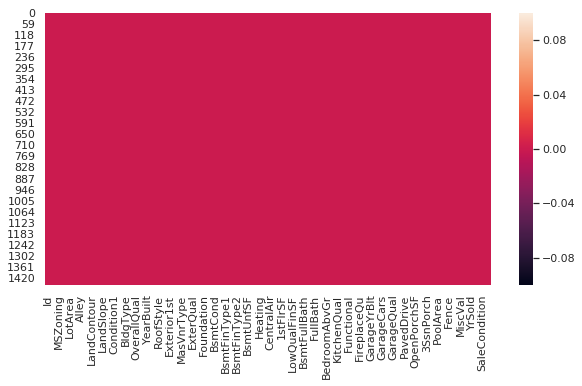

In [42]:
# Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

# Now, there is no missing value 

In [43]:
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [44]:

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape train: {}'.format(train.shape))

Shape train: (1456, 80)


In [45]:
# Adding total sqfootage feature 
# Transform the data 
train['TotalSF'] =train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Feature Selection

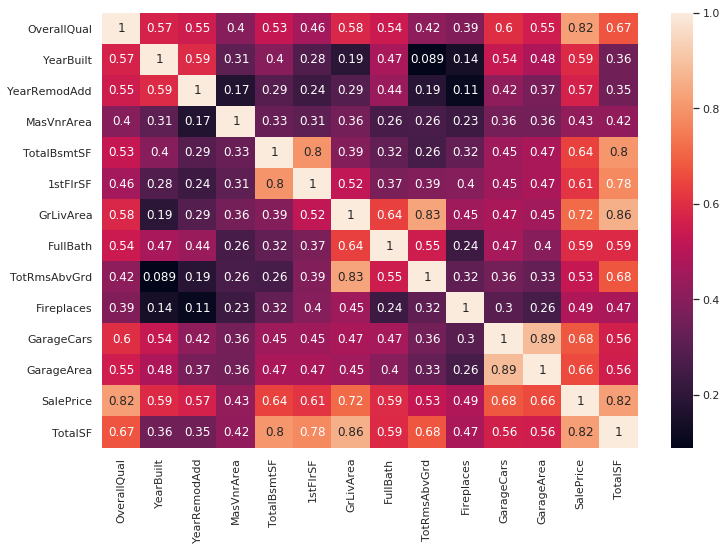

In [46]:
train_corr = train.select_dtypes(include=[np.number])
train_corr.shape
#Delete Id because that is not need for corralation plot
del train_corr['Id']
#Correlation plot
corr = train_corr.corr()
#plt.subplots(figsize=(30,18))
#sns.heatmap(corr, annot=True)

top_feature = corr.index[abs(corr['SalePrice']>0.4)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [47]:
df=train[top_feature]
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,TotalSF
0,7,2003,2003,196.0,856,856,1710,2,8,0,2,548,12.247699,2566
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,2,460,12.109016,2524
2,7,2001,2002,162.0,920,920,1786,2,6,1,2,608,12.317171,2706
3,7,1915,1970,0.0,756,961,1717,1,7,1,3,642,11.849405,2473
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,3,836,12.429220,3343


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OverallQual,1456.0,6.088599,1.369669,1.000000,5.000000,6.000000,7.000000,10.000000
YearBuilt,1456.0,1971.185440,30.201590,1872.000000,1954.000000,1972.000000,2000.000000,2010.000000
YearRemodAdd,1456.0,1984.819368,20.652143,1950.000000,1966.750000,1993.500000,2004.000000,2010.000000
MasVnrArea,1456.0,101.526786,177.011773,0.000000,0.000000,0.000000,163.250000,1600.000000
TotalBsmtSF,1456.0,1050.658654,412.155715,0.000000,795.000000,990.500000,1293.750000,3206.000000
1stFlrSF,1456.0,1157.108516,369.307331,334.000000,882.000000,1086.000000,1389.250000,3228.000000
GrLivArea,1456.0,1506.502060,496.815378,334.000000,1128.000000,1458.500000,1775.250000,3627.000000
FullBath,1456.0,1.561813,0.547683,0.000000,1.000000,2.000000,2.000000,3.000000
TotRmsAbvGrd,1456.0,6.506181,1.611800,2.000000,5.000000,6.000000,7.000000,14.000000
Fireplaces,1456.0,0.609203,0.640359,0.000000,0.000000,1.000000,1.000000,3.000000


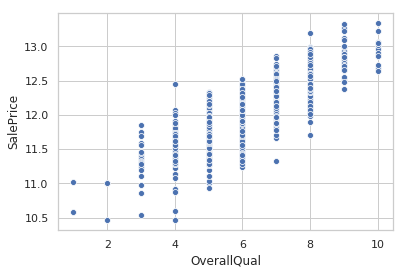

In [49]:
sns.scatterplot(train.OverallQual,train.SalePrice)

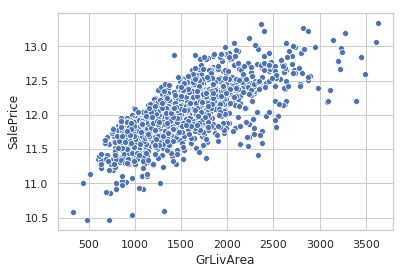

In [50]:
sns.scatterplot(train.GrLivArea,train.SalePrice)

# Convert panda dataframe into spark data frame 

In [51]:
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
sqlContext = SQLContext(spark)
spark_df = sqlContext.createDataFrame(df)

vectorAssembler = VectorAssembler(inputCols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
                                             'Fireplaces','GarageCars','GarageArea','TotalSF'], 
                                  outputCol = 'features')
house_df = vectorAssembler.transform(spark_df)

house_df = house_df.select(['features', 'SalePrice'])
house_df.printSchema()
house_df.take(30)

root
 |-- features: vector (nullable = true)
 |-- SalePrice: double (nullable = true)



[Row(features=DenseVector([7.0, 2003.0, 2003.0, 196.0, 856.0, 856.0, 1710.0, 2.0, 8.0, 0.0, 2.0, 548.0, 2566.0]), SalePrice=12.24769911637256),
 Row(features=DenseVector([6.0, 1976.0, 1976.0, 0.0, 1262.0, 1262.0, 1262.0, 2.0, 6.0, 1.0, 2.0, 460.0, 2524.0]), SalePrice=12.109016442313738),
 Row(features=DenseVector([7.0, 2001.0, 2002.0, 162.0, 920.0, 920.0, 1786.0, 2.0, 6.0, 1.0, 2.0, 608.0, 2706.0]), SalePrice=12.317171167298682),
 Row(features=DenseVector([7.0, 1915.0, 1970.0, 0.0, 756.0, 961.0, 1717.0, 1.0, 7.0, 1.0, 3.0, 642.0, 2473.0]), SalePrice=11.849404844423074),
 Row(features=DenseVector([8.0, 2000.0, 2000.0, 350.0, 1145.0, 1145.0, 2198.0, 2.0, 9.0, 1.0, 3.0, 836.0, 3343.0]), SalePrice=12.429220196836383),
 Row(features=DenseVector([5.0, 1993.0, 1995.0, 0.0, 796.0, 796.0, 1362.0, 1.0, 5.0, 0.0, 2.0, 480.0, 2158.0]), SalePrice=11.870606902224587),
 Row(features=DenseVector([8.0, 2004.0, 2005.0, 186.0, 1686.0, 1694.0, 1694.0, 2.0, 7.0, 1.0, 2.0, 636.0, 3380.0]), SalePrice=12.6346

# Spliting data into test data and train data

In [52]:
splits = house_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]
train_df.describe().show()
test_df.describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|               999|
|   mean| 12.01910759485302|
| stddev|0.4014389386745425|
|    min|10.471978128496518|
|    max|13.323928581764989|
+-------+------------------+

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|               457|
|   mean|12.028161913642464|
| stddev|0.3844558874783223|
|    min|10.460270761075149|
|    max|13.345508528717259|
+-------+------------------+



# Linear Regression -1st Iteration

In [53]:
from pyspark.ml.regression import LinearRegression
# Instantiate the instance.
# 
lr = LinearRegression(featuresCol='features', labelCol='SalePrice', maxIter=10, regParam=0.9, elasticNetParam=0.8)


# elasticNetParam ---> alpha: 0-ridge;1-lasso;

# Fit the training data.
lr_model = lr.fit(train_df)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")


Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: 12.01910759485302



In [54]:
# Summarise the model and print out some evaluation metrics.
trainingSummary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(trainingSummary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(trainingSummary.r2))

RMSE: 0.40123796797925654
R2: 2.220446049250313e-16


In [55]:
train_df.describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|               999|
|   mean| 12.01910759485302|
| stddev|0.4014389386745425|
|    min|10.471978128496518|
|    max|13.323928581764989|
+-------+------------------+



RMSE measures the differences between predicted values and actual values. However, RMSE alone is meaningless until we compare with the actual "medv" value, such as mean, min and max. After such comparison, our RMSE looks pretty good.



# Evaluating the Model using the Testing Set


In [56]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_df)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 0.38414174817223057
R2 on test data: -0.0005558657147919366


In [57]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","SalePrice","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))


+-----------------+------------------+--------------------+
|       prediction|         SalePrice|            features|
+-----------------+------------------+--------------------+
|12.01910759485302|11.002116507732017|[2.0,1920.0,1950....|
|12.01910759485302|11.002116507732017|[2.0,1936.0,1950....|
|12.01910759485302|11.112462823634855|[3.0,1914.0,1950....|
|12.01910759485302|11.418625774449598|[3.0,1922.0,1950....|
|12.01910759485302|10.859018228147887|[3.0,1935.0,2003....|
+-----------------+------------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = -0.000555866


In [58]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.384142


In [59]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 1
objectiveHistory: [0.5000000000000568]
+--------------------+
|           residuals|
+--------------------+
| -1.0004620583893207|
| -1.4401023520267735|
| -1.5471294663565018|
| -0.5574648980099539|
| -1.4763748189063115|
|   -1.04230846776208|
| -0.4573824419491874|
|  -0.434782822852501|
| -0.6686892947438885|
| -0.7418918052561274|
| -0.7168908155956384|
| -0.8277519610019297|
| -0.6397020940011906|
|   -0.57338018444627|
| -0.7046208735590387|
|-0.30323312265411495|
| -0.4787907232908797|
| -0.6454327030294849|
| -0.4455480963459415|
| -0.2790385892032994|
+--------------------+
only showing top 20 rows



In [60]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","SalePrice","features").show()

+-----------------+------------------+--------------------+
|       prediction|         SalePrice|            features|
+-----------------+------------------+--------------------+
|12.01910759485302|11.002116507732017|[2.0,1920.0,1950....|
|12.01910759485302|11.002116507732017|[2.0,1936.0,1950....|
|12.01910759485302|11.112462823634855|[3.0,1914.0,1950....|
|12.01910759485302|11.418625774449598|[3.0,1922.0,1950....|
|12.01910759485302|10.859018228147887|[3.0,1935.0,2003....|
|12.01910759485302|11.245059091624615|[3.0,1940.0,1966....|
|12.01910759485302|11.695255355062795|[3.0,1948.0,2002....|
|12.01910759485302|11.439289689006644|[3.0,1950.0,1950....|
|12.01910759485302|11.846543632608535|[3.0,1955.0,1955....|
|12.01910759485302|11.745433036677353|[3.0,1955.0,2005....|
|12.01910759485302| 11.51293546492023|[4.0,1885.0,1995....|
|12.01910759485302|11.626263078808801|[4.0,1910.0,2000....|
|12.01910759485302| 11.60733523953139|[4.0,1916.0,1990....|
|12.01910759485302| 11.58989576532275|[4

# Decision Tree Regression- 1st Iteration

In [61]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'SalePrice',maxBins=32,maxDepth = 5)
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.182989


# Feature Importance

In [62]:
dt_model.featureImportances

SparseVector(13, {0: 0.6193, 1: 0.018, 2: 0.022, 3: 0.0011, 5: 0.0116, 6: 0.0068, 8: 0.0008, 9: 0.0101, 10: 0.022, 11: 0.0092, 12: 0.2793})

In [63]:
spark_df.take(1)

[Row(OverallQual=7, YearBuilt=2003, YearRemodAdd=2003, MasVnrArea=196.0, TotalBsmtSF=856, 1stFlrSF=856, GrLivArea=1710, FullBath=2, TotRmsAbvGrd=8, Fireplaces=0, GarageCars=2, GarageArea=548, SalePrice=12.24769911637256, TotalSF=2566)]

# Gradient-boosted tree regression - 1st Iteration

In [64]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'SalePrice', maxIter=30)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'SalePrice', 'features').show(5)

+------------------+------------------+--------------------+
|        prediction|         SalePrice|            features|
+------------------+------------------+--------------------+
|10.745963253071968|11.002116507732017|[2.0,1920.0,1950....|
|11.007510918726028|11.002116507732017|[2.0,1936.0,1950....|
|11.040733688027514|11.112462823634855|[3.0,1914.0,1950....|
|11.551691988529141|11.418625774449598|[3.0,1922.0,1950....|
|11.210078404757182|10.859018228147887|[3.0,1935.0,2003....|
+------------------+------------------+--------------------+
only showing top 5 rows



In [65]:
gbt_evaluator = RegressionEvaluator(
    labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.173781


# Random Forest Regression -1st Iteration

In [66]:
from pyspark.ml.regression import RandomForestRegressor

model = RandomForestRegressor(featuresCol = 'features', labelCol='SalePrice',numTrees=15, maxDepth=30, seed=42)
rf_model = model.fit(train_df)
rf_model.transform(test_df)
dt_evaluator = RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.182989


# Linear Regression -2nd Iteration

In [67]:
from pyspark.ml.regression import LinearRegression
# Instantiate the instance.
# 
lr = LinearRegression(featuresCol='features', labelCol='SalePrice', maxIter=15, regParam=0.5, elasticNetParam=0.5)


# elasticNetParam ---> alpha: 0-ridge;1-lasso;

# Fit the training data.
lr_model = lr.fit(train_df)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")


Coefficients: [0.0249207180080732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5853520054403576e-05]
Intercept: 11.749508612944847



In [68]:
# Summarise the model and print out some evaluation metrics.
trainingSummary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(trainingSummary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(trainingSummary.r2))

RMSE: 0.34527300208008344
R2: 0.2595065911989729


In [69]:
train_df.describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|               999|
|   mean| 12.01910759485302|
| stddev|0.4014389386745425|
|    min|10.471978128496518|
|    max|13.323928581764989|
+-------+------------------+



In [70]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_df)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))

RMSE on test data: 0.33006709343090457
R2 on test data: 0.261309042007675


In [71]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","SalePrice","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))


+------------------+------------------+--------------------+
|        prediction|         SalePrice|            features|
+------------------+------------------+--------------------+
|  11.8327314115606|11.002116507732017|[2.0,1920.0,1950....|
| 11.84813819429888|11.002116507732017|[2.0,1936.0,1950....|
|11.903505649623076|11.112462823634855|[3.0,1914.0,1950....|
|11.919829502762443|11.418625774449598|[3.0,1922.0,1950....|
|11.870078433503416|10.859018228147887|[3.0,1935.0,2003....|
+------------------+------------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.261309


In [72]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.330067


In [73]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 16
objectiveHistory: [0.5000000000000568, 0.49615406237671933, 0.48526431049242774, 0.48364101617452265, 0.4831900735667527, 0.48311511467581775, 0.4830142157901219, 0.48293518185227313, 0.482887830200016, 0.48285994749531425, 0.4828437997717949, 0.48283445437205164, 0.48283001194604847, 0.4828262693966715, 0.4828218937843521, 0.4828218873070854]
+--------------------+
|           residuals|
+--------------------+
| -0.8285533308155593|
| -1.2107391638248455|
| -1.3713912997167022|
| -0.4853779433116383|
| -1.3534363104676626|
|  -0.926706522532136|
| -0.3490253528878391|
|-0.35205785150156466|
| -0.5667516984901564|
| -0.6074899168038783|
|  -0.604040081568959|
| -0.6659296675571476|
| -0.4925529269738167|
|-0.42623101741889613|
| -0.5530697686064432|
|-0.27394975878508987|
|-0.40227823376581995|
| -0.6070703421896884|
|-0.33496644142045895|
|-0.20014171663541092|
+--------------------+
only showing top 20 rows



In [74]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","SalePrice","features").show()

+------------------+------------------+--------------------+
|        prediction|         SalePrice|            features|
+------------------+------------------+--------------------+
|  11.8327314115606|11.002116507732017|[2.0,1920.0,1950....|
| 11.84813819429888|11.002116507732017|[2.0,1936.0,1950....|
|11.903505649623076|11.112462823634855|[3.0,1914.0,1950....|
|11.919829502762443|11.418625774449598|[3.0,1922.0,1950....|
|11.870078433503416|10.859018228147887|[3.0,1935.0,2003....|
|11.917536826759724|11.245059091624615|[3.0,1940.0,1966....|
|11.908274415708734|11.695255355062795|[3.0,1948.0,2002....|
|11.871958427825646|11.439289689006644|[3.0,1950.0,1950....|
|11.903734917223348|11.846543632608535|[3.0,1955.0,1955....|
|11.930880201095555|11.745433036677353|[3.0,1955.0,2005....|
|11.926592226828973| 11.51293546492023|[4.0,1885.0,1995....|
|11.936588294200833|11.626263078808801|[4.0,1910.0,2000....|
|11.958873104947273| 11.60733523953139|[4.0,1916.0,1990....|
|11.939660480044479| 11.

# Decision Tree Regression- 2nd Iteration

In [75]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'SalePrice',maxBins=20,maxDepth = 10)
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.206173


# Gradient-boosted tree regression - 2nd Iteration

In [86]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'SalePrice', maxIter=15)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'SalePrice', 'features').show(20)

+------------------+------------------+--------------------+
|        prediction|         SalePrice|            features|
+------------------+------------------+--------------------+
|10.714927561382178|11.002116507732017|[2.0,1920.0,1950....|
|11.104942490412713|11.002116507732017|[2.0,1936.0,1950....|
|11.058570669965244|11.112462823634855|[3.0,1914.0,1950....|
|11.625290428737669|11.418625774449598|[3.0,1922.0,1950....|
|11.206230790495017|10.859018228147887|[3.0,1935.0,2003....|
|11.219031626727144|11.245059091624615|[3.0,1940.0,1966....|
|11.367627908033542|11.695255355062795|[3.0,1948.0,2002....|
|11.285228987290042|11.439289689006644|[3.0,1950.0,1950....|
|11.191780792191828|11.846543632608535|[3.0,1955.0,1955....|
|11.843301748506661|11.745433036677353|[3.0,1955.0,2005....|
| 11.46809642191145| 11.51293546492023|[4.0,1885.0,1995....|
|11.522193946488143|11.626263078808801|[4.0,1910.0,2000....|
| 11.48876132494556| 11.60733523953139|[4.0,1916.0,1990....|
| 11.55499659198246| 11.

In [77]:
gbt_evaluator = RegressionEvaluator(
    labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.173329


In [88]:
gbt_model.featureImportances

SparseVector(13, {0: 0.1433, 1: 0.0885, 2: 0.0958, 3: 0.0392, 4: 0.05, 5: 0.0674, 6: 0.1032, 7: 0.0235, 8: 0.0339, 9: 0.0363, 10: 0.0175, 11: 0.1588, 12: 0.1427})

In [89]:
spark_df.take(1)

[Row(OverallQual=7, YearBuilt=2003, YearRemodAdd=2003, MasVnrArea=196.0, TotalBsmtSF=856, 1stFlrSF=856, GrLivArea=1710, FullBath=2, TotRmsAbvGrd=8, Fireplaces=0, GarageCars=2, GarageArea=548, SalePrice=12.24769911637256, TotalSF=2566)]

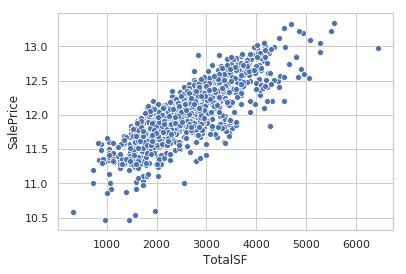

In [99]:
sns.scatterplot(train.TotalSF,train.SalePrice)

# Random Forest Regression -2nd Iteration

In [87]:
from pyspark.ml.regression import RandomForestRegressor
model = RandomForestRegressor(featuresCol = 'features', labelCol='SalePrice',numTrees=10, maxDepth=20, seed=42)
rf_model = model.fit(train_df)
rf_model.transform(test_df)
dt_evaluator = RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.206173
